# Similaridade na atividade neural dos diferentes tempos
### Medida através da matriz de confusão
- Foram selecionadas as tentativas com $\textbf{duração > 1300ms}$
- A atividade foi convolucionada com kernel gaussiano de $\sigma_{kernel}=100$ms.
- Os últimos 300ms das tentativas foram descartados, para diminuir a influência da ação motora.
- A atividade foi dividida em 20 bins de 50ms

### As medidas
- Para cada um dos instantes i = 1, 2,...,20, o vetor médio das atividades foi utilizado como template $\tau_i$ para comparação. O template sempre foi feito deixando de fora toda uma trial, e testado nas tentativas daquela trial.
- Para cada instante j, cada tentativa $\mathscr{t} \in \mathscr{T}$(o subconjunto de tentativas) foi comparada aos templates, e classificada como pertencente ao tempo cujo template era mais similar a ela.
- As medidas de distância utilizadas foram a euclideana, $$D_e(\vec{u},\vec{v}) = ||\vec{u}-\vec{v}||$$ e a de mahalanobis $$ D_m(\vec{u},\vec{v}) = \sqrt{(\vec{u}-\vec{v})^T\textbf{S}^{-1}(\vec{u}-\vec{v})}$$ sendo $\textbf{S}^{-1}$ a matriz de precisão, ou o inverso da matriz de covariância calculada sobre as tentativas $\mathscr{T}$

# RETIRAR TRIAL INTEIRA

In [1]:
import pickle
from spikeHelper.similarities import distanceGeneralization
from spikeHelper.dataOrganization import XyTfromEpoch, trialToXyT,getX,normRows
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

## Rato 7

In [368]:
rat = 8
data = pickle.load(open('Data/r'+str(rat)+'_bin100_sigma100.pickle','rb'))
data = XyTfromEpoch(data,getBins=[5,15])[:,:20,:]
print('Number of neurons',data.shape[0])
print('Number of times',data.shape[1])
print('Number of trials',data.shape[2])
nTrials=50

Number of neurons 37
Number of times 10
Number of trials 620


In [369]:
data.shape

(37, 10, 620)

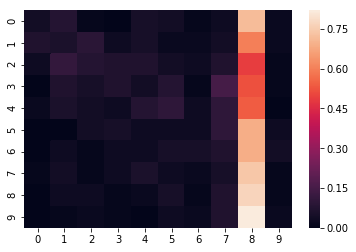

In [396]:
normalize=0
nTrials=100
beg = trialToXyT(data[:,:,:nTrials])
end = trialToXyT(data[:,:,-nTrials:])
allt = trialToXyT(data)


#plt.subplot(1,3,1)
clf = SVC(C=15, decision_function_shape='ovo')
sim = distanceGeneralization(getX(beg), beg['y'], beg['trial'], clf)
if normalize:
    sim = normRows(sim)
sns.heatmap(sim)

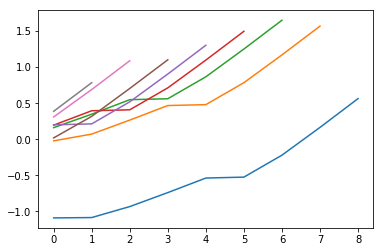

In [437]:
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[:9])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[9:17])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[17:24])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[24:30])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[30:35])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[35:39])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[39:42])
plt.plot(clf.decision_function(getX(beg)).sum(axis=0)[42:44])

In [ ]:
def readout(vec,num):
    1=[]

In [425]:
(y==1).shape

(1000,)

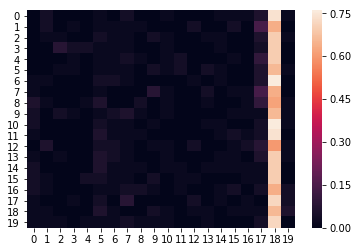

In [20]:
#plt.subplot(1,3,2)
clf = SVC(C=15)
sim = distanceGeneralization(getX(end), end['y'], end['trial'], clf)
if normalize:
    sim = normRows(sim)
sns.heatmap(sim)

In [22]:
sim

array([[ 0.  ,  0.04,  0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.04,  0.  ,
         0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.02,  0.02,  0.02,  0.06,
         0.74,  0.02],
       [ 0.  ,  0.04,  0.  ,  0.02,  0.  ,  0.02,  0.02,  0.02,  0.02,
         0.  ,  0.  ,  0.  ,  0.04,  0.  ,  0.  ,  0.04,  0.  ,  0.14,
         0.64,  0.  ],
       [ 0.  ,  0.02,  0.02,  0.  ,  0.  ,  0.04,  0.02,  0.02,  0.  ,
         0.04,  0.02,  0.  ,  0.  ,  0.02,  0.02,  0.  ,  0.  ,  0.06,
         0.7 ,  0.02],
       [ 0.  ,  0.  ,  0.08,  0.04,  0.04,  0.02,  0.02,  0.02,  0.  ,
         0.  ,  0.02,  0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.  ,  0.04,
         0.7 ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.02,  0.02,  0.04,  0.02,
         0.  ,  0.02,  0.04,  0.  ,  0.  ,  0.  ,  0.02,  0.  ,  0.1 ,
         0.7 ,  0.  ],
       [ 0.  ,  0.  ,  0.02,  0.02,  0.  ,  0.02,  0.02,  0.02,  0.  ,
         0.04,  0.02,  0.04,  0.  ,  0.04,  0.02,  0.  ,  0.  ,  0.06,
         0.66,  0.02],
       [ 0

In [359]:
X,y,ytrial,clf = getX(end), end['y'], end['trial'], SVC(C=30,gamma=1e-5)

In [360]:
from sklearn.covariance import EmpiricalCovariance
from scipy.spatial.distance import mahalanobis, euclidean
from sklearn.metrics import confusion_matrix
import numpy as np
from spikeHelper.dataOrganization import normRows

In [361]:

n_classes = len(np.unique(y))

clf.fit(X,y)

times = np.unique(y)
trials = np.unique(ytrial)

confusionPerTrial = np.full((times.shape[0],times.shape[0],trials.shape[0]),np.nan)
for i,testTrial in enumerate(trials):
    clf.fit(X[ytrial != testTrial,:],y[ytrial != testTrial])
    confusionPerTrial[:,:,i] = confusion_matrix(y[ytrial==testTrial], clf.predict(X[ytrial==testTrial]))


    

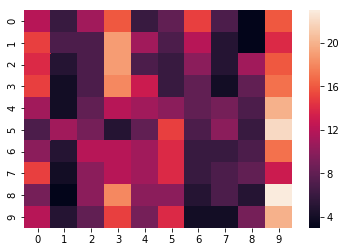

In [363]:
sns.heatmap(confusionPerTrial.sum(axis=2))

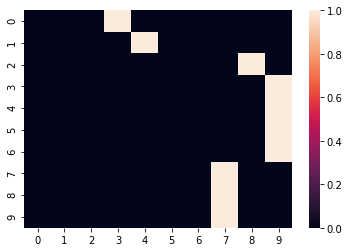

In [364]:
sns.heatmap(confusionPerTrial[:,:,5])

In [365]:
from scipy import stats as st
t1=[np.nonzero(confusionPerTrial[:,:,i]) for i in trials]

#st.pearsonr(t1[0],t1[1])

In [366]:
np.nan_to_num(np.array(list(map(lambda x: st.pearsonr(x[0],x[1])[0],t1)))).mean()

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


0.033383932864956237

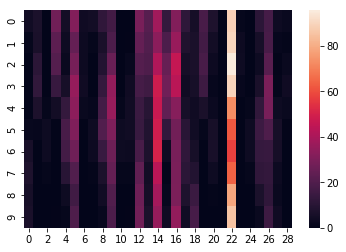

In [367]:
sns.heatmap(X[ytrial==testTrial])

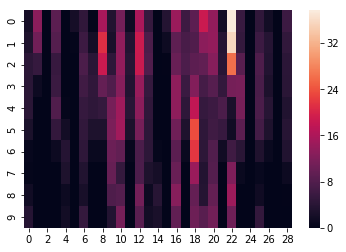

In [263]:
i=i+1
sns.heatmap(X[ytrial==16])

In [130]:
clf.support_vectors

(980, 29)

In [55]:
confusionPerTrial[:,:,1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [21]:
#plt.subplot(1,3,3)
clf = SVC(C=15)
sim = distanceGeneralization(getX(allt), allt['y'], allt['trial'], clf)
if normalize:
    sim = normRows(sim)
sns.heatmap(sim)

KeyboardInterrupt: 